# Import Basic Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [6]:

train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


* we have luxary score columns in which value are there but when we build recommendation system e don't ask any client to write Luxary because they don't know that values 
* so we have to change that into categorical column

# luxury_score

<Axes: xlabel='luxury_score'>

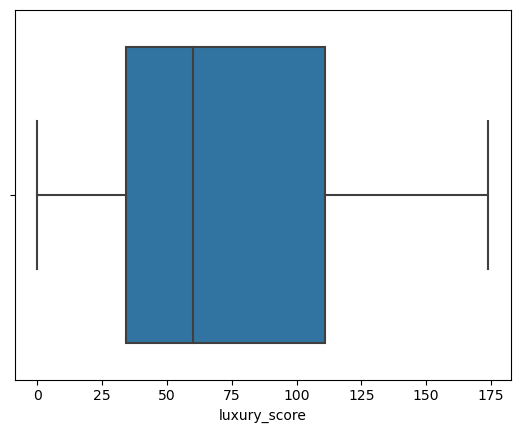

In [7]:
# box plot
sns.boxplot(x=df['luxury_score'])

In [8]:
# make one function which can trasform luxary score into categorical features
def categorize_luxary(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score < 175:
        return "High"
    else:
        return None
    

In [9]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxary)

In [10]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High


## floorNum

<Axes: xlabel='floorNum'>

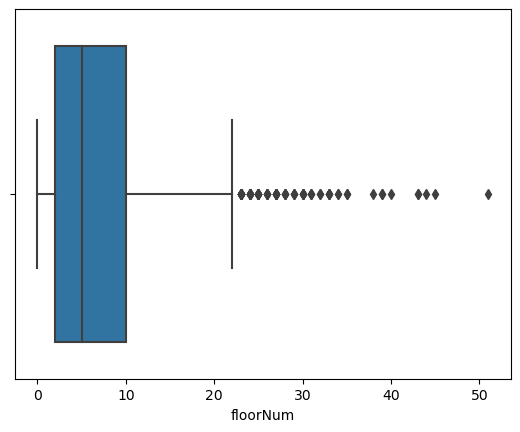

In [13]:
sns.boxplot(x=df['floorNum'])

In [14]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low floor"
    
    elif 3 <= floor <= 10:
        return"Mid floor"
    
    elif 11 <= floor <= 51:
        return "High Floor"
    
    else:
        return None # or undefined or any other label for floors outside the defined bins

In [15]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low,Low floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low,Mid floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High,Mid floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High,Mid floor


In [17]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [19]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Mid floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,High,Mid floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,High,Mid floor


Now we have convert categorical columns into numerical columns so we used **Ordinal Endcoding**

In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [21]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [22]:
# target
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3549     0.37
3550     6.00
3551     0.60
3552    15.50
3553     1.78
Name: price, Length: 3554, dtype: float64

## Feature Selection Techniques

For Feature selction we have many techique so we use some technique on our dataset  

### 1. Correlation analysis

<Axes: >

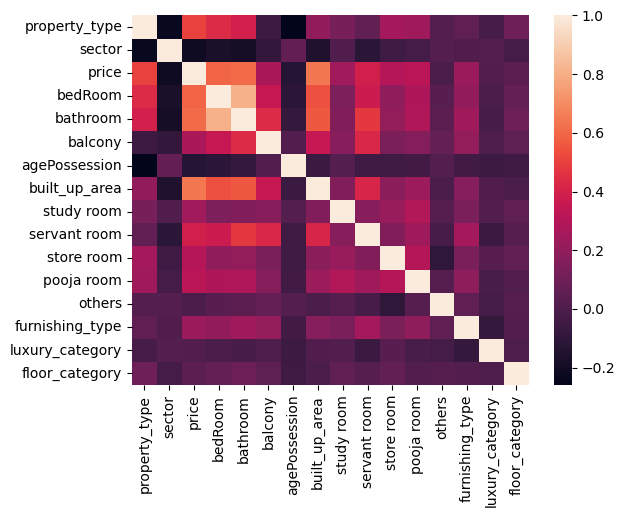

In [23]:
sns.heatmap(data_label_encoded.corr())

In [24]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.643678
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### 2. Random Forest Feature Importance

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.562848
1,sector,0.103142
0,property_type,0.086595
2,bedRoom,0.078912
3,bathroom,0.055195
8,servant room,0.031956
4,balcony,0.014714
5,agePossession,0.013834
7,study room,0.012043
12,furnishing_type,0.011310


### 3 - Gradient Boosting Feature importances

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.564189
1,sector,0.108951
0,property_type,0.103146
2,bedRoom,0.097943
3,bathroom,0.063502
8,servant room,0.036126
7,study room,0.009683
9,store room,0.004803
4,balcony,0.004654
12,furnishing_type,0.002567


### 4 - Permutation Importance

In [28]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.589144
0,property_type,0.200464
2,bedRoom,0.153391
1,sector,0.148942
8,servant room,0.063210
3,bathroom,0.045462
5,agePossession,0.003870
4,balcony,0.003776
13,luxury_category,0.001597
9,store room,0.001527


### 5 - LASSO

In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.117434
0,property_type,0.823747
3,bathroom,0.346214
8,servant room,0.211322
9,store room,0.201122
7,study room,0.196460
2,bedRoom,0.180618
12,furnishing_type,0.156725
10,pooja room,0.075111
13,luxury_category,0.060254


### 6 - RFE

In [30]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.563732
1,sector,0.104730
2,bedRoom,0.082177
0,property_type,0.077255
3,bathroom,0.058052
8,servant room,0.031884
5,agePossession,0.014183
4,balcony,0.013299
7,study room,0.012209
12,furnishing_type,0.012201


### 7 - Linear Regression Weights

In [32]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.121049
0,property_type,0.824353
3,bathroom,0.352414
8,servant room,0.220437
9,store room,0.205501
7,study room,0.204380
2,bedRoom,0.183206
12,furnishing_type,0.165986
10,pooja room,0.078033
13,luxury_category,0.071739


### 8 - SHAP

In [34]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/5e/a0/b510b682cac4f2d0b25c05a490c0a689eb234d36edb42c96c885383f064a/shap-0.42.1-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/462.3 kB ? eta -:--:--
   ---------------- ----------------------- 194.6/462.3 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 462.3/462.3 kB 5.8 MB/s eta 0:00:00


In [35]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-0.12023367,  0.14485869, -0.55165867, ..., -0.01115881,
        -0.00175353, -0.00463746],
       [-0.20175229, -0.38074586, -0.19073758, ..., -0.01143193,
        -0.00184534, -0.00652969],
       [-0.15554857, -0.39570988, -0.60497313, ..., -0.01246466,
        -0.01147414, -0.00593834],
       ...,
       [-0.08491592,  0.08826794, -0.50409091, ...,  0.01003292,
         0.0137477 , -0.00753582],
       [ 1.39314681,  0.99946437,  1.33675228, ...,  0.04378038,
         0.00220541,  0.02686282],
       [-0.20567354,  0.03126698, -0.10401035, ..., -0.00404526,
        -0.03099275,  0.03326544]])

In [37]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,0.867144
0,property_type,0.402838
1,sector,0.363829
2,bedRoom,0.342919
3,bathroom,0.273810
8,servant room,0.157821
4,balcony,0.035346
7,study room,0.030739
12,furnishing_type,0.027658
5,agePossession,0.023351


In [38]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature')

In [39]:
final_fi_df

,feature,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
0,sector,-0.212084,0.103142,0.108951,0.148942,-0.087631,0.104730,-0.096602,0.363829
1,bedRoom,0.591289,0.078912,0.097943,0.153391,0.180618,0.082177,0.183206,0.342919
2,bathroom,0.609777,0.055195,0.063502,0.045462,0.346214,0.058052,0.352414,0.273810
3,balcony,0.269637,0.014714,0.004654,0.003776,-0.001653,0.013299,-0.024463,0.035346
4,agePossession,-0.134171,0.013834,0.002061,0.003870,-0.000000,0.014183,0.002400,0.023351
5,built_up_area,0.643678,0.562848,0.564189,0.589144,1.117434,0.563732,1.121049,0.867144
6,study room,0.242955,0.012043,0.009683,-0.002236,0.196460,0.012209,0.204380,0.030739
7,servant room,0.391930,0.031956,0.036126,0.063210,0.211322,0.031884,0.220437,0.157821
8,store room,0.305677,0.006013,0.004803,0.001527,0.201122,0.006775,0.205501,0.013606
9,pooja room,0.319852,0.006249,0.000473,-0.001525,0.075111,0.005136,0.078033,0.010543


In [52]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

TypeError: unsupported operand type(s) for /: 'str' and 'str'